In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
walmart = yf.download(tickers="WMT",period="5y", interval="1mo", rounding=True)
ibm = yf.download(tickers="IBM", period="5y", interval="1mo", rounding=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


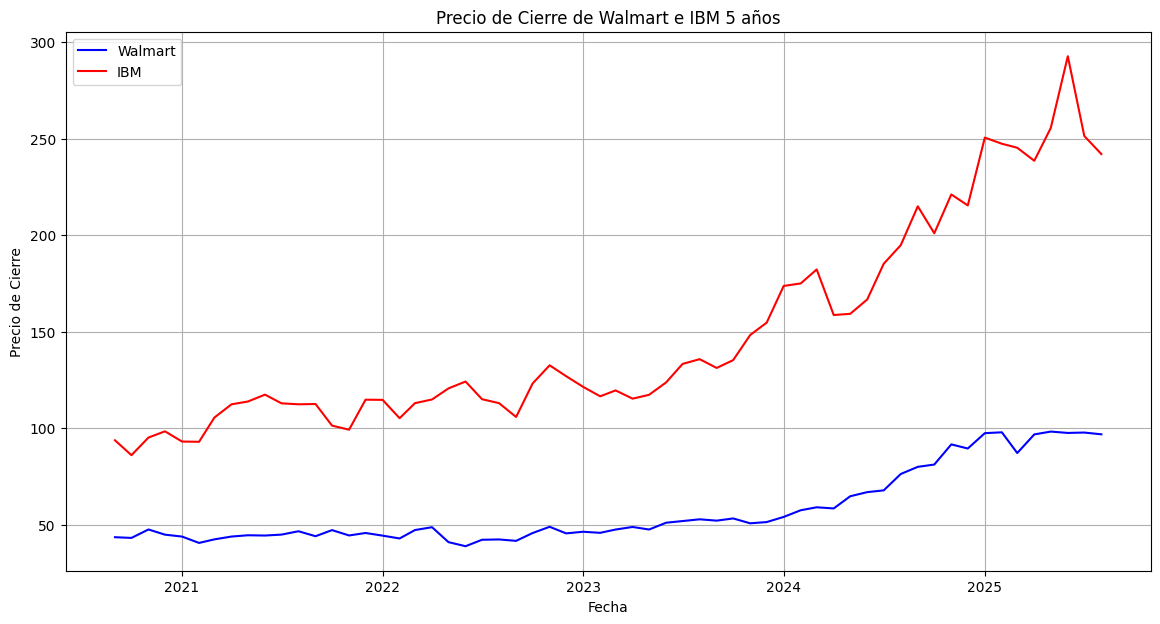

In [3]:
# extraer la columna de precios de cierre
walmart = walmart['Close']
ibm = ibm['Close']

# indexamos la accion y la fecha
walmart.index = pd.to_datetime(walmart.index, format='%Y-%m-%d')
ibm.index = pd.to_datetime(ibm.index, format='%Y-%m-%d')

# Grafica de las dos acciones al momento

plt.figure(figsize=(14, 7))
plt.plot(walmart, label='Walmart', color='blue')
plt.plot(ibm, label='IBM', color='red')
plt.title('Precio de Cierre de Walmart e IBM 5 años')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.grid()
plt.show()

¿Existe alguna correlación entre los precios de las acciones de ambas empresas? Explica tanto de forma gráfica como a través del índice de correlación discutido en esta lección

In [4]:
# Verificar la autocorrelacion entre las dos empresas

walmart_ibm = yf.download(tickers="WMT IBM", period="5y", interval="1mo", rounding=True)
walmart_ibm = walmart_ibm['Close']
rendimiento = walmart_ibm.pct_change()
rendimiento

[*********************100%***********************]  2 of 2 completed


Ticker,IBM,WMT
Date,,
2020-09-01,NaN,NaN
2020-10-01,-0.082258,-0.008276
2020-11-01,0.106254,0.101298
2020-12-01,0.033838,-0.056620
2021-01-01,-0.053771,-0.021865
2021-02-01,-0.001504,-0.075274
2021-03-01,0.135449,0.045634
2021-04-01,0.064715,0.034206
2021-05-01,0.013082,0.015283


In [5]:
# Eliminamos los valores nulos
rendimiento = rendimiento.dropna()

# Verificamos la autocorrelacion
corr = rendimiento.corr()
print("Correlación entre Walmart e IBM:", corr.iloc[0, 1])

Correlación entre Walmart e IBM: 0.29806305145967305


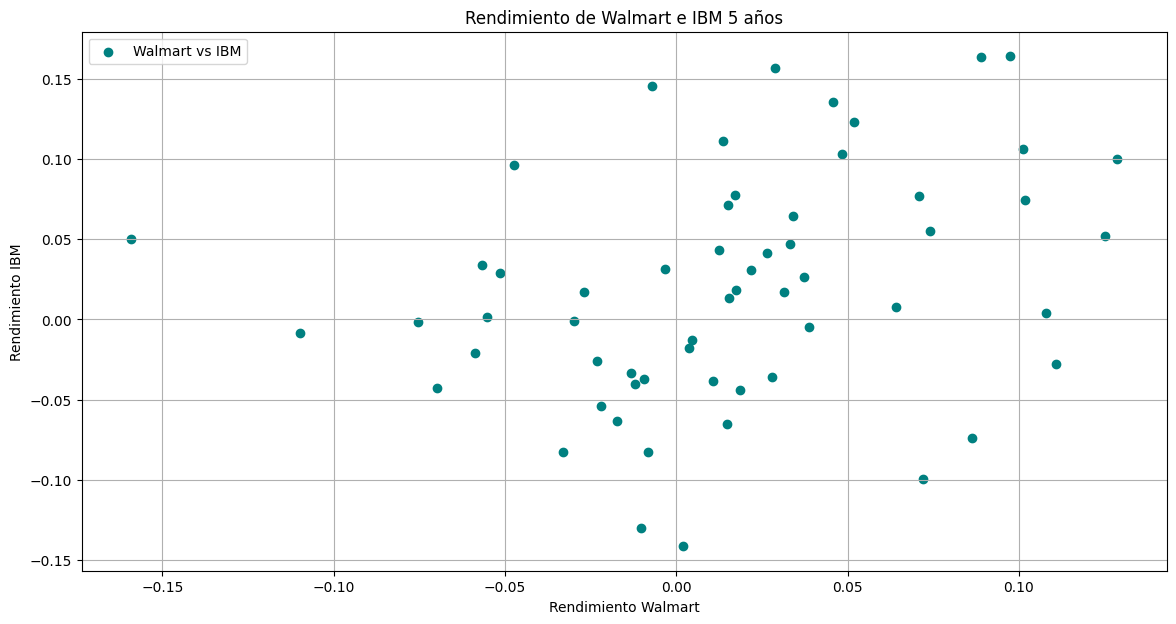

In [6]:
# Graficar los rendimientos
plt.figure(figsize=(14, 7))
plt.scatter(rendimiento['WMT'], rendimiento['IBM'], label='Walmart vs IBM', color='teal')
plt.title('Rendimiento de Walmart e IBM 5 años')
plt.xlabel('Rendimiento Walmart')
plt.ylabel('Rendimiento IBM')
plt.legend()
plt.grid()
plt.show()

Obtén los gráficos de descomposición para ambas series de precios así como sus correlogramas. Interpreta tus resultados.

In [7]:
walmart

Ticker,WMT
Date,
2020-09-01,43.50
2020-10-01,43.14
2020-11-01,47.51
2020-12-01,44.82
2021-01-01,43.84
2021-02-01,40.54
2021-03-01,42.39
2021-04-01,43.84
2021-05-01,44.51


In [8]:
ibm

Ticker,IBM
Date,
2020-09-01,93.73
2020-10-01,86.02
2020-11-01,95.16
2020-12-01,98.38
2021-01-01,93.09
2021-02-01,92.95
2021-03-01,105.54
2021-04-01,112.37
2021-05-01,113.84


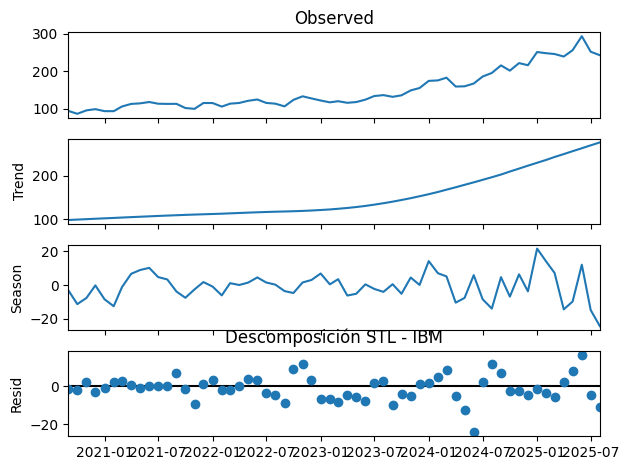

In [9]:
from statsmodels.tsa.seasonal import STL

# Descomposición para IBM
ibm_stl = STL(ibm.dropna(), period=12).fit()
ibm_stl.plot()
plt.title("Descomposición STL - IBM")
plt.show()

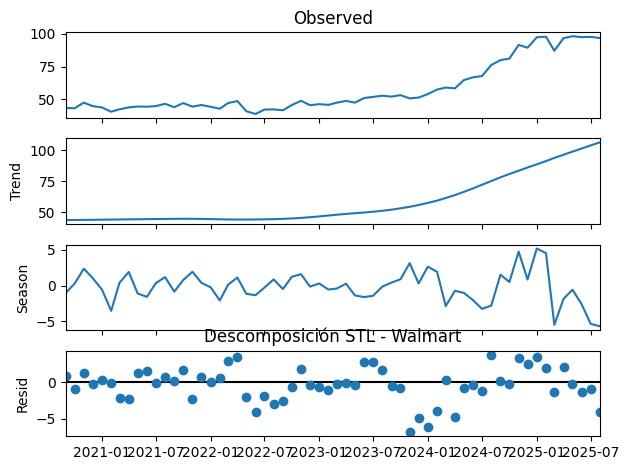

In [10]:
# Descomposición para Walmart
walmart_stl = STL(walmart.dropna(), period=12).fit()
walmart_stl.plot()
plt.title("Descomposición STL - Walmart")
plt.show()

In [11]:
# Calcular la diferencias

walmart_diff = walmart.diff()
ibm_diff = ibm.diff()

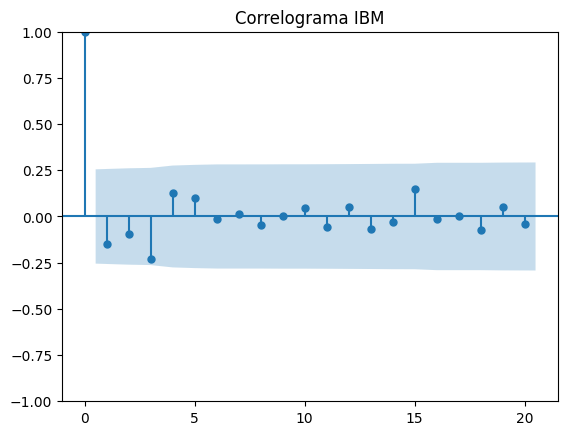

In [12]:
import statsmodels.graphics.tsaplots as sgt
# Correlograma para IBM
sgt.plot_acf(ibm_diff.dropna(), lags=20)
plt.title("Correlograma IBM")
plt.show()


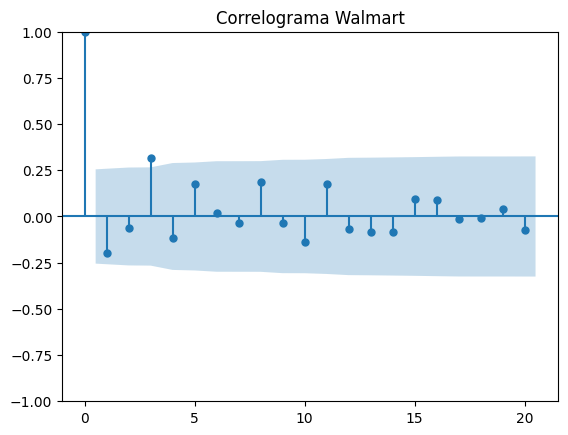

In [13]:
# Correlograma para Walmart
sgt.plot_acf(walmart_diff.dropna(), lags=20)
plt.title("Correlograma Walmart")
plt.show()


Aplica e interpreta la prueba de Dickey-Fuller para ambas series.

In [14]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

In [36]:
# Aplicar prueba de Dickey-Fuller
from statsmodels.tsa.stattools import adfuller

print("=== PRUEBA DE DICKEY-FULLER ===\n")

# Walmart original
result_wal = adfuller(walmart.dropna())
print(f"Walmart (Original):")
print(f"  Estadístico ADF: {result_wal[0]:.6f}")
print(f"  p-valor: {result_wal[1]:.6f}")
print(f"  Conclusión: {'Estacionaria' if result_wal[1] < 0.05 else 'No estacionaria'}\n")

# IBM original  
result_ibm = adfuller(ibm.dropna())
print(f"IBM (Original):")
print(f"  Estadístico ADF: {result_ibm[0]:.6f}")
print(f"  p-valor: {result_ibm[1]:.6f}")
print(f"  Conclusión: {'Estacionaria' if result_ibm[1] < 0.05 else 'No estacionaria'}\n")

# Walmart diferenciada
result_wal_diff = adfuller(walmart_diff.dropna())
print(f"Walmart (Diferenciada):")
print(f"  Estadístico ADF: {result_wal_diff[0]:.6f}")
print(f"  p-valor: {result_wal_diff[1]:.6f}")
print(f"  Conclusión: {'Estacionaria' if result_wal_diff[1] < 0.05 else 'No estacionaria'}\n")

# IBM diferenciada
result_ibm_diff = adfuller(ibm_diff.dropna())
print(f"IBM (Diferenciada):")
print(f"  Estadístico ADF: {result_ibm_diff[0]:.6f}")
print(f"  p-valor: {result_ibm_diff[1]:.6f}")
print(f"  Conclusión: {'Estacionaria' if result_ibm_diff[1] < 0.05 else 'No estacionaria'}")

=== PRUEBA DE DICKEY-FULLER ===

Walmart (Original):
  Estadístico ADF: 0.591359
  p-valor: 0.987401
  Conclusión: No estacionaria

IBM (Original):
  Estadístico ADF: 1.362522
  p-valor: 0.996937
  Conclusión: No estacionaria

Walmart (Diferenciada):
  Estadístico ADF: -3.406603
  p-valor: 0.010736
  Conclusión: Estacionaria

IBM (Diferenciada):
  Estadístico ADF: -6.215183
  p-valor: 0.000000
  Conclusión: Estacionaria


Haz un análisis gráfico de promedios móviles para ambas empresas y pronostica el siguiente día de cotizaciones. ¿Esperarías que dichos pronósticos sean buenos? Explica a detalle.

In [16]:
# Nuevos datos diarios
walmart_day = yf.download(tickers="WMT", period="5y", interval="1d", rounding=True)
walmart_day = walmart_day['Close']
ibm_day = yf.download(tickers="IBM", period="5y", interval="1d", rounding=True)
ibm_day = ibm_day['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [17]:
walmart_day.shape
print("El tamaño de Walmart es:", walmart_day.shape)
ibm_day.shape
print("El tamaño de IBM es:", ibm_day.shape)

El tamaño de Walmart es: (1256, 1)
El tamaño de IBM es: (1256, 1)


In [18]:
# creacion de grupos de prueba y entrenamiento

len_train_wal = int(len(walmart_day) * 0.8)
print("El tamaño del conjunto de entrenamiento de Walmart:", len_train_wal)
len_test_wal = len(walmart_day) - len_train_wal
print("El tamaño del conjunto de prueba de Walmart:", len_test_wal)

len_train_ibm = int(len(ibm_day) * 0.8)
print("El tamaño del conjunto de entrenamiento de IBM es:", len_train_ibm)
len_test_ibm = len(ibm_day) - len_train_ibm
print("El tamaño del conjunto de prueba de IBM es:", len_test_ibm)

El tamaño del conjunto de entrenamiento de Walmart: 1004
El tamaño del conjunto de prueba de Walmart: 252
El tamaño del conjunto de entrenamiento de IBM es: 1004
El tamaño del conjunto de prueba de IBM es: 252


In [19]:
# Creacion de conjuntos de entrenamiento y prueba diarios
train_walmart = walmart_day[:len_train_wal]
test_walmart = walmart_day[len_train_wal:]
print("Tamaño de conjunto de Train walmart", (len(train_walmart)))
print("Tamaño de conjunto de Test walmart", (len(test_walmart)))

train_ibm = ibm_day[:len_train_ibm]
test_ibm = ibm_day[len_train_ibm:]
print("Tamaño de conjunto de Train ibm", (len(train_ibm)))
print("Tamaño de conjunto de Test ibm", (len(test_ibm)))

Tamaño de conjunto de Train walmart 1004
Tamaño de conjunto de Test walmart 252
Tamaño de conjunto de Train ibm 1004
Tamaño de conjunto de Test ibm 252


In [20]:
y_pred_wal = walmart_day.copy()
y_pred_wal = pd.DataFrame(y_pred_wal)

y_pred_ibm = ibm_day.copy()
y_pred_ibm = pd.DataFrame(y_pred_ibm)

In [21]:
# Creacion de prediccion Walmart usando media movil de 30 días (Walmart)
y_pred_wal['Predicción'] = walmart_day.rolling(30).mean()
print("Predicción de Walmart:", y_pred_wal.head(35))
print(f"Valores NaN: {y_pred_wal['Predicción'].isna().sum()}")

Predicción de Walmart: Ticker        WMT  Predicción
Date                         
2020-08-24  40.83         NaN
2020-08-25  40.62         NaN
2020-08-26  40.64         NaN
2020-08-27  42.48         NaN
2020-08-28  43.62         NaN
2020-08-31  43.17         NaN
2020-09-01  45.89         NaN
2020-09-02  45.92         NaN
2020-09-03  44.94         NaN
2020-09-04  44.41         NaN
2020-09-08  43.05         NaN
2020-09-09  43.50         NaN
2020-09-10  42.54         NaN
2020-09-11  42.50         NaN
2020-09-14  42.70         NaN
2020-09-15  42.71         NaN
2020-09-16  42.37         NaN
2020-09-17  42.50         NaN
2020-09-18  42.07         NaN
2020-09-21  42.62         NaN
2020-09-22  43.01         NaN
2020-09-23  42.28         NaN
2020-09-24  42.50         NaN
2020-09-25  42.68         NaN
2020-09-28  42.68         NaN
2020-09-29  42.64         NaN
2020-09-30  43.50         NaN
2020-10-01  44.49         NaN
2020-10-02  43.69         NaN
2020-10-05  44.09   43.021333
2020-10-06  43.73

In [22]:
# Creacion de prediccion IBM usando media movil de 30 días (IBM)
y_pred_ibm['Predicción'] = ibm_day.rolling(30).mean()
print("Predicción de IBM:", y_pred_ibm.head(35))
print(f"Valores NaN: {y_pred_ibm['Predicción'].isna().sum()}")

Predicción de IBM: Ticker         IBM  Predicción
Date                          
2020-08-24   96.82         NaN
2020-08-25   96.02         NaN
2020-08-26   95.66         NaN
2020-08-27   96.03         NaN
2020-08-28   96.35         NaN
2020-08-31   95.00         NaN
2020-09-01   95.07         NaN
2020-09-02   98.75         NaN
2020-09-03   95.88         NaN
2020-09-04   94.22         NaN
2020-09-08   93.38         NaN
2020-09-09   94.19         NaN
2020-09-10   92.88         NaN
2020-09-11   93.57         NaN
2020-09-14   94.06         NaN
2020-09-15   94.33         NaN
2020-09-16   95.70         NaN
2020-09-17   96.24         NaN
2020-09-18   94.57         NaN
2020-09-21   92.64         NaN
2020-09-22   92.84         NaN
2020-09-23   91.55         NaN
2020-09-24   90.98         NaN
2020-09-25   91.64         NaN
2020-09-28   93.78         NaN
2020-09-29   93.17         NaN
2020-09-30   93.73         NaN
2020-10-01   93.29         NaN
2020-10-02   92.89         NaN
2020-10-05   94.00  

In [23]:
# Creacion de prediccion usando media movil de 30 días (Walmart)

y_pred_wal_m =pd.DataFrame(index=y_pred_wal.index)
y_pred_wal_m['Predicción'] =np.nan

# calcular la prediccion usando media movil
for i in range(30, len(y_pred_wal)):
    y_pred_wal_m['Predicción'].iloc[i] = walmart_day.iloc[i-30:i].mean()

print(f"Valores no nulos: {y_pred_wal_m['Predicción'].count()}")
print(f"Valores NaN: {y_pred_wal_m['Predicción'].isna().sum()}")
y_pred_wal_m.head(35)

Valores no nulos: 1226
Valores NaN: 30


,Predicción
Date,
2020-08-24,NaN
2020-08-25,NaN
2020-08-26,NaN
2020-08-27,NaN
2020-08-28,NaN
2020-08-31,NaN
2020-09-01,NaN
2020-09-02,NaN
2020-09-03,NaN


In [32]:
# filtrar las predicciones para el periodo de prueba (Walmart)
y_pred_wal_m_test = y_pred_wal_m['Predicción'][len_train_wal:]
print(f"Periodo de test: desde indice {len_train_wal}")
print(f"Fechas del periodo de test: desde {walmart_day.index[len_train_wal]} hasta {walmart_day.index[-1]}")
y_pred_wal_m_test

Periodo de test: desde indice 1004
Fechas del periodo de test: desde 2024-08-21 00:00:00 hasta 2025-08-22 00:00:00


Date
2024-08-21    69.050000
2024-08-22    69.216000
2024-08-23    69.413333
2024-08-26    69.633000
2024-08-27    69.851667
                ...    
2025-08-18    98.070000
2025-08-19    98.122667
2025-08-20    98.270333
2025-08-21    98.470000
2025-08-22    98.580667
Name: Predicción, Length: 252, dtype: float64

In [30]:
# Creacion de prediccion IBM usando media movil de 30 días (IBM)

y_pred_ibm_m = pd.DataFrame(index=y_pred_ibm.index)
y_pred_ibm_m['Predicción'] = np.nan

# calcular la prediccion usando media movil
for i in range(30, len(y_pred_ibm)):
    y_pred_ibm_m['Predicción'].iloc[i] = ibm_day.iloc[i-30:i].mean()

print(f"Valores no nulos: {y_pred_ibm_m['Predicción'].count()}")
print(f"Valores NaN: {y_pred_ibm_m['Predicción'].isna().sum()}")
y_pred_ibm_m.head(35)

Valores no nulos: 1226
Valores NaN: 30


,Predicción
Date,
2020-08-24,NaN
2020-08-25,NaN
2020-08-26,NaN
2020-08-27,NaN
2020-08-28,NaN
2020-08-31,NaN
2020-09-01,NaN
2020-09-02,NaN
2020-09-03,NaN


In [29]:
# filtrar las predicciones para el periodo de prueba (IBM)
y_pred_ibm_m_test = y_pred_ibm_m['Predicción'][len_train_ibm:]
print(f"Periodo de test IBM: desde indice {len_train_ibm}")
print(f"Fechas del periodo de test IBM: desde {ibm_day.index[len_train_ibm]} hasta {ibm_day.index[-1]}")
y_pred_ibm_m_test

Periodo de test IBM: desde indice 1004
Fechas del periodo de test IBM: desde 2024-08-21 00:00:00 hasta 2025-08-22 00:00:00


Date
2024-08-21    181.852667
2024-08-22    182.530667
2024-08-23    183.153000
2024-08-26    183.634667
2024-08-27    184.175667
                 ...    
2025-08-18    263.662333
2025-08-19    261.960333
2025-08-20    260.387333
2025-08-21    258.866000
2025-08-22    257.329333
Name: Predicción, Length: 252, dtype: float64

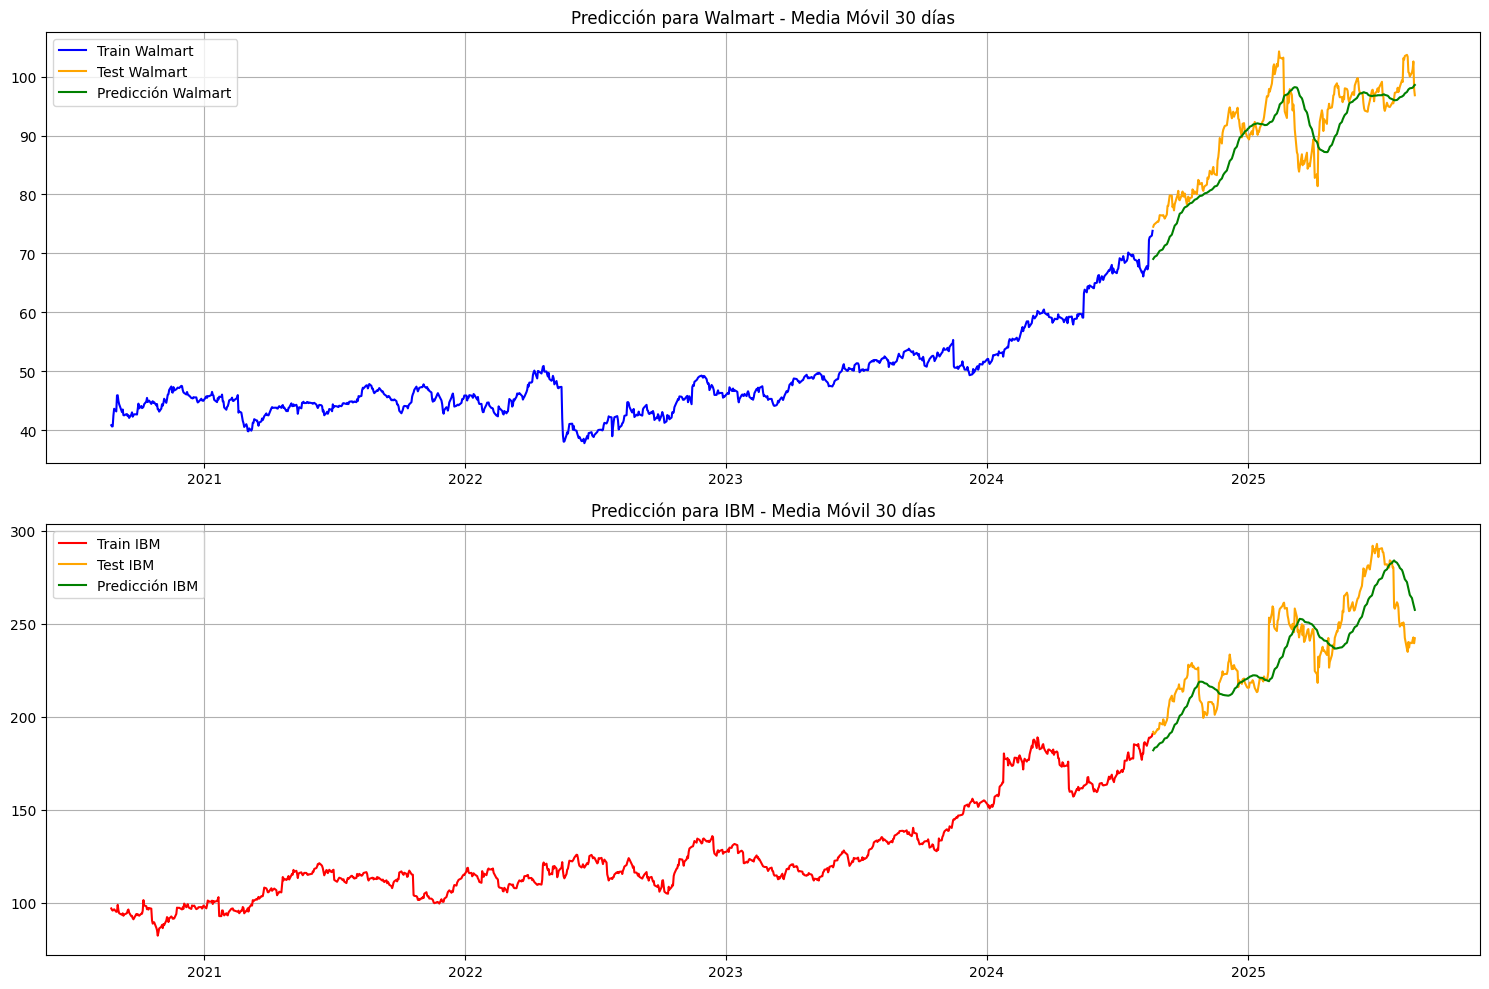

In [28]:
# Gráfico comparativo de ambas empresas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# Grafico Walmart
ax1.grid()
ax1.plot(train_walmart, label='Train Walmart', color='blue')
ax1.plot(test_walmart, label='Test Walmart', color='orange') 
ax1.plot(y_pred_wal_m_test, label='Predicción Walmart', color='green')
ax1.set_title('Predicción para Walmart - Media Móvil 30 días')
ax1.legend()

# Grafico IBM
ax2.grid()
ax2.plot(train_ibm, label='Train IBM', color='red')
ax2.plot(test_ibm, label='Test IBM', color='orange')
ax2.plot(y_pred_ibm_m_test, label='Predicción IBM', color='green')
ax2.set_title('Predicción para IBM - Media Móvil 30 días')
ax2.legend()

plt.tight_layout()
plt.show()